In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 300)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

import sweetviz

In [2]:
f = open("fred_key.txt", "r")
key = f.read()

In [3]:
# Fred Object
fred = Fred(api_key=key)

In [4]:
# Search for economic data!
sp_search = fred.search('S&P', limit=1000, order_by='popularity')

In [5]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2022-07-13   2022-07-13   
CSUSHPINSA          CSUSHPINSA     2022-07-13   2022-07-13   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2022-07-13   2022-07-13   
SP500                    SP500     2022-07-13   2022-07-13   
MEHOINUSA672N    MEHOINUSA672N     2022-07-13   2022-07-13   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2022-07-12  Daily, Close   
CSUSHPINSA            1987-01-01      2022-04-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2022-07-12  Daily, Close   
SP500                 2012-07-16      2022-07-13  Daily, Close   
MEHOINUSA672N         1984-01-01      2020-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
BAMLH0A0HYM2EY               D                         Percent   
SP500                        D                           Index   
MEHOINUSA672N                A  2020 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2020 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2022-07-13 07:22:21-05:00   
CSUSHPINSA                           NSA  2022-06-28 08:01:01-05:00   
BAMLH0A0HYM2EY                       NSA  2022-07-13 07:22:26-05:00   
SP500                                NSA  2022-07-13 19:10:58-05:00   
MEHOINUSA672N                        NSA  2021-09-15 08:45:01-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           96  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             89  For more information regarding the index, plea...  
BAMLH0A0HYM2EY         85  This data represents the effective yield of th...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          82  Household data are collected as of March.  As ...

In [6]:
sp_search.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, BAMLH0A0HYM2 to MEHOINUSAKA646N
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1000 non-null   object        
 1   realtime_start             1000 non-null   datetime64[ns]
 2   realtime_end               1000 non-null   datetime64[ns]
 3   title                      1000 non-null   object        
 4   observation_start          1000 non-null   datetime64[ns]
 5   observation_end            1000 non-null   datetime64[ns]
 6   frequency                  1000 non-null   object        
 7   frequency_short            1000 non-null   object        
 8   units                      1000 non-null   object        
 9   units_short                1000 non-null   object        
 10  seasonal_adjustment        1000 non-null   object        
 11  seasonal_adjustment_short  1000 non-null   object   

In [7]:
# Pull raw data
sp500 = fred.get_series(series_id='SP500')

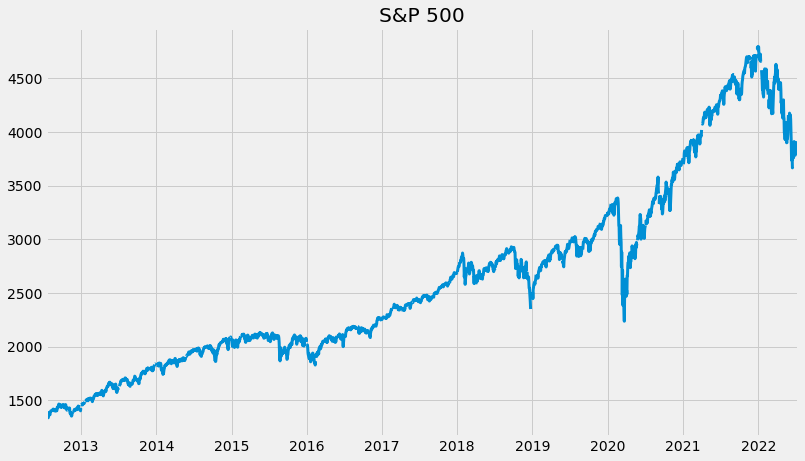

In [8]:
sp500.plot(figsize=(12,7), title='S&P 500', lw=3)
plt.show()

In [9]:
# Pull and Join Multiple Data Series
fred.search('Unemployment')

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2022-07-13   2022-07-13   
UNRATENSA                          UNRATENSA     2022-07-13   2022-07-13   
NROU                                    NROU     2022-07-13   2022-07-13   
UNEMPLOY                            UNEMPLOY     2022-07-13   2022-07-13   
CCSA                                    CCSA     2022-07-13   2022-07-13   
...                                      ...            ...          ...   
LRHUTTTTCZM156N              LRHUTTTTCZM156N     2022-07-13   2022-07-13   
LAUMT471686000000003A  LAUMT471686000000003A     2022-07-13   2022-07-13   
LAUMT064090000000003A  LAUMT064090000000003A     2022-07-13   2022-07-13   
LRUN64TTTRQ156N              LRUN64TTTRQ156N     2022-07-13   2022-07-13   
LRUN64TTTRA156N              LRUN64TTTRA156N     2022-07-13   2022-07-13   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
NROU                                    Noncyclical Rate of Unemployment   
UNEMPLOY                                              Unemployment Level   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LRHUTTTTCZM156N        Harmonized Unemployment Rate: Total: All Perso...   
LAUMT471686000000003A      Unemployment Rate in Chattanooga, TN-GA (MSA)   
LAUMT064090000000003A  Unemployment Rate in Sacramento--Roseville--Ar...   
LRUN64TTTRQ156N        Unemployment Rate: Aged 15-64: All Persons for...   
LRUN64TTTRA156N        Unemployment Rate: Aged 15-64: All Persons for...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2022-06-01   
UNRATENSA                    1948-01-01      2022-06-01   
NROU                         1949-01-01      2032-10-01   
UNEMPLOY                     1948-01-01      2022-06-01   
CCSA                         1967-01-07      2022-06-25   
...                                 ...             ...   
LRHUTTTTCZM156N              1993-01-01      2022-04-01   
LAUMT471686000000003A        1990-01-01      2021-01-01   
LAUMT064090000000003A        1990-01-01      2021-01-01   
LRUN64TTTRQ156N              2006-01-01      2020-10-01   
LRUN64TTTRA156N              2006-01-01      2020-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
NROU                                 Quarterly               Q   
UNEMPLOY                               Monthly               M   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LRHUTTTTCZM156N                        Monthly               M   
LAUMT471686000000003A                   Annual               A   
LAUMT064090000000003A                   Annual               A   
LRUN64TTTRQ156N                      Quarterly               Q   
LRUN64TTTRA156N                         Annual               A   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
NROU                                Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
CCSA                                 Numb

In [10]:
unrate = fred.get_series('UNRATE')

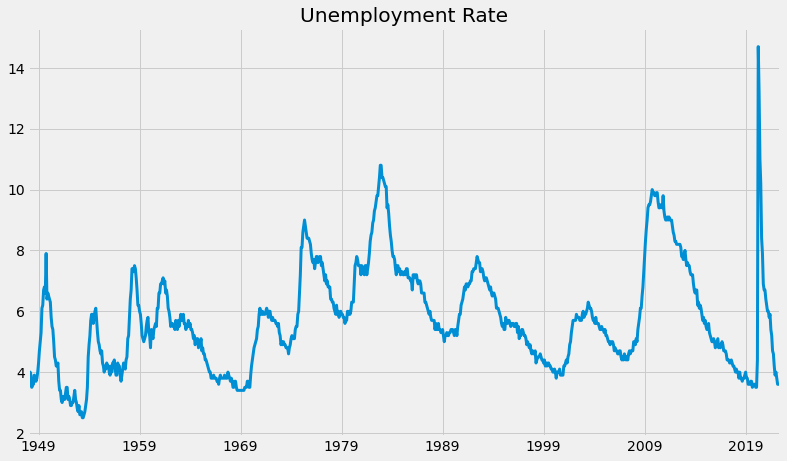

In [11]:
unrate.plot(figsize=(12,7), title='Unemployment Rate', lw=3)
plt.show()

In [12]:
# Searching on filters "state wise monthly unemployment rate"
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [13]:
# Querying the unemployment dataframe by "seasonally adjusted" and "percentage units"
unemp_df_sa_pu = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [17]:
unemp_df_sa_pu.shape

(159, 15)

In [18]:
# Filtering the above dataframe by 'Unemployment Rate' title
unemp_rate_df = unemp_df_sa_pu.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [19]:
unemp_rate_df.shape

(99, 15)

In [230]:
all_results = []
for idx in unemp_rate_df.index:
    res = fred.get_series(idx)
    res = res.to_frame(name=idx)
    all_results.append(res)

In [231]:
all_results

[            UNRATE
 1948-01-01     3.4
 1948-02-01     3.8
 1948-03-01     4.0
 1948-04-01     3.9
 1948-05-01     3.5
 ...            ...
 2022-02-01     3.8
 2022-03-01     3.6
 2022-04-01     3.6
 2022-05-01     3.6
 2022-06-01     3.6
 
 [894 rows x 1 columns],
             LNS14000006
 1972-01-01         11.2
 1972-02-01         11.2
 1972-03-01         10.7
 1972-04-01          9.8
 1972-05-01         10.2
 ...                 ...
 2022-02-01          6.6
 2022-03-01          6.2
 2022-04-01          5.9
 2022-05-01          6.2
 2022-06-01          5.8
 
 [606 rows x 1 columns],
             LNS14000031
 1972-01-01          8.1
 1972-02-01          7.6
 1972-03-01          7.0
 1972-04-01          6.7
 1972-05-01          7.0
 ...                 ...
 2022-02-01          6.4
 2022-03-01          5.6
 2022-04-01          6.1
 2022-05-01          5.7
 2022-06-01          5.3
 
 [606 rows x 1 columns],
             CAUR
 1976-01-01   9.2
 1976-02-01   9.2
 1976-03-01   9.1
 1976-0

In [232]:
# Dropping columns which have NaN show that a single row doesn't contain any null values like index -> 2022-05-01
unemp_results = pd.concat(all_results, axis=1).drop(['LRUN25TTUSM156S', 'CPACUR'], axis=1)

In [233]:
unemp_results = unemp_results.drop(['M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'USAURAMS'], axis=1)

In [234]:
unemp_results[unemp_results.index == '2022-05-01']

UNRATE  LNS14000006  LNS14000031  CAUR  LNS14000024  FLUR  TXUR  \
2022-05-01     3.6          6.2          5.7   4.3          3.4   3.0   4.2   

            LNS14000009  NYUR  U2RATE  LNS14000002  OHUR  LNS14000003  MIUR  \
2022-05-01          4.3   4.4     1.7          3.6   3.9          3.2   4.3   

            LNS14000001  LNS14027662  PAUR  ALUR  MNUR  NCUR  WIUR  \
2022-05-01          3.6          2.0   4.6   2.7   2.0   3.4   2.9   

            LNS14000012  COUR  GAUR  ILUR  NJUR  VAUR  WAUR  AZUR  \
2022-05-01         10.4   3.5   3.0   4.6   3.9   3.0   3.9   3.2   

            LRUN64TTUSM156S  TNUR  MOUR  MAUR  LNS14027660  INUR  ORUR  \
2022-05-01         3.587821   3.3   3.1   3.9          3.8   2.2   3.6   

            LNS14032183  KYUR  SCUR  LAUR  NMUR  LNS14000018  ARUR  \
2022-05-01          2.4   3.8   3.3   4.0   5.1         18.3   3.2   

            LASMT261982000000003  NVUR  UTUR  IAUR  WVUR  HIUR  \
2022-05-01                   4.6   4.9   2.0   2.7   3.5   4.2   

            LASMT391746000000003  OKUR  KSUR  MDUR  AKUR  LNS14024887  NDUR  \
2022-05-01                   5.5   2.8   2.3   4.0   4.7          7.8   2.6   

            LNS14000032  LNS14027659  MSUR  CTUR  IDUR  LNS14000036  DCUR  \
2022-05-01          5.9          5.2   4.0   4.2   2.5          6.7   5.7   

            MEUR  SDUR  PRUR  CNERUR  LNS14000028  LNS14000060  NEUR  MTUR  \
2022-05-01   3.2   2.3   6.2     4.2          3.1          3.1   1.9   2.4   

            LNS14000026  CWSTUR  RIUR  CMWRUR  WYUR  NHUR  LNS14000029  \
2022-05-01          3.4     4.0   2.9     3.4   3.2   2.1          2.9   

            LNS14027689  DEUR  LNS14000025  VTUR  LRHUTTTTUSM156S  \
2022-05-01          3.4   4.5          3.4   2.3              3.6   

            LRUNTTTTUSM156S  LNS14000315  LRUN24TTUSM156S  LNS14000048  \
2022-05-01              3.6          2.3              7.8          3.0   

            LNS14024230  LNS14000150  CSOUUR  CNEWUR  LNS14000089  \
2022-05-01          2.7          2.0     3.5     3.6          3.9   

            LNS14000015  LNS14100000  
2022-05-01          9.0          3.4

In [235]:
# Dropping UNRATE cause it's not a state
unemp_states = unemp_results.drop('UNRATE', axis=1) 

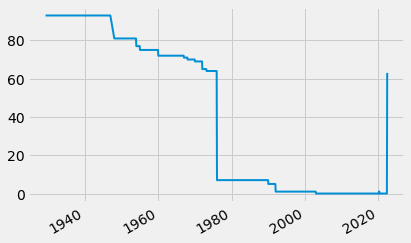

In [236]:
# Checking how many null values are there for each date
unemp_states.isna().sum(axis=1).plot(lw=2)
plt.show()

In [237]:
unemp_states = unemp_states.dropna()

In [137]:
# Plot Unemployment Rate by State IDs
px.line(unemp_states)

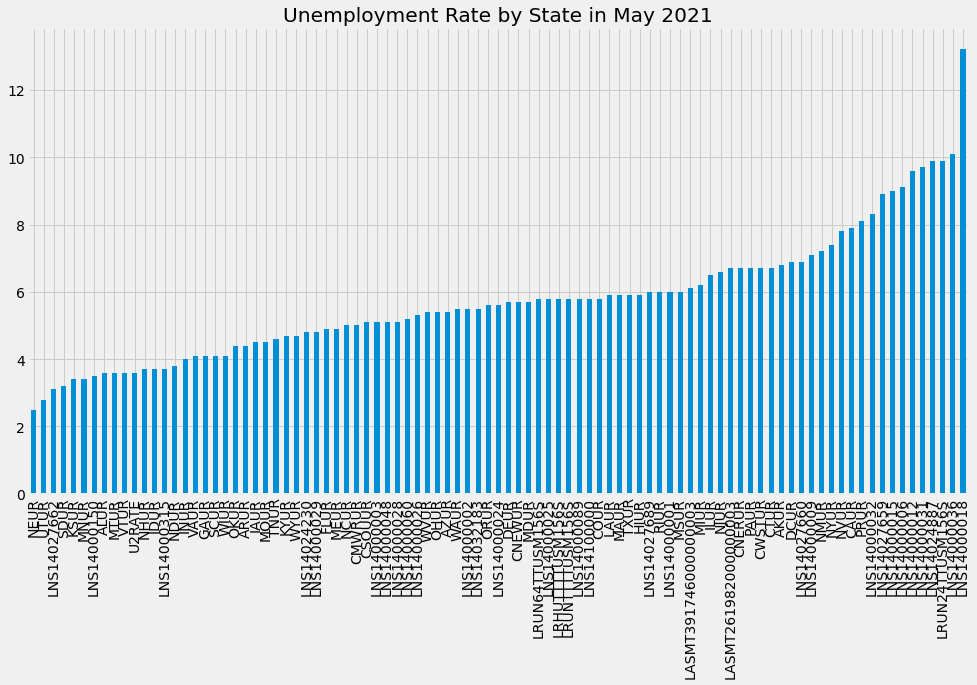

In [138]:
# Pull May 2021 Unemployment Rate per State sorted from lowest to highest
ax = unemp_states.loc[unemp_states.index == '2021-05-01'].T \
            .sort_values('2021-05-01') \
            .plot(kind='bar', figsize=(15,8), title='Unemployment Rate by State in May 2021')
ax.legend().remove()
plt.show()

In [238]:
id_2_state = unemp_rate_df['title'].str.replace('Unemployment Rate in','').to_dict()

In [239]:
unemp_states.columns = [id_2_state[cols] for cols in unemp_states.columns]

In [147]:
# Plot Unemployment Rate by States, Gender and Other Categories
px.line(unemp_states)

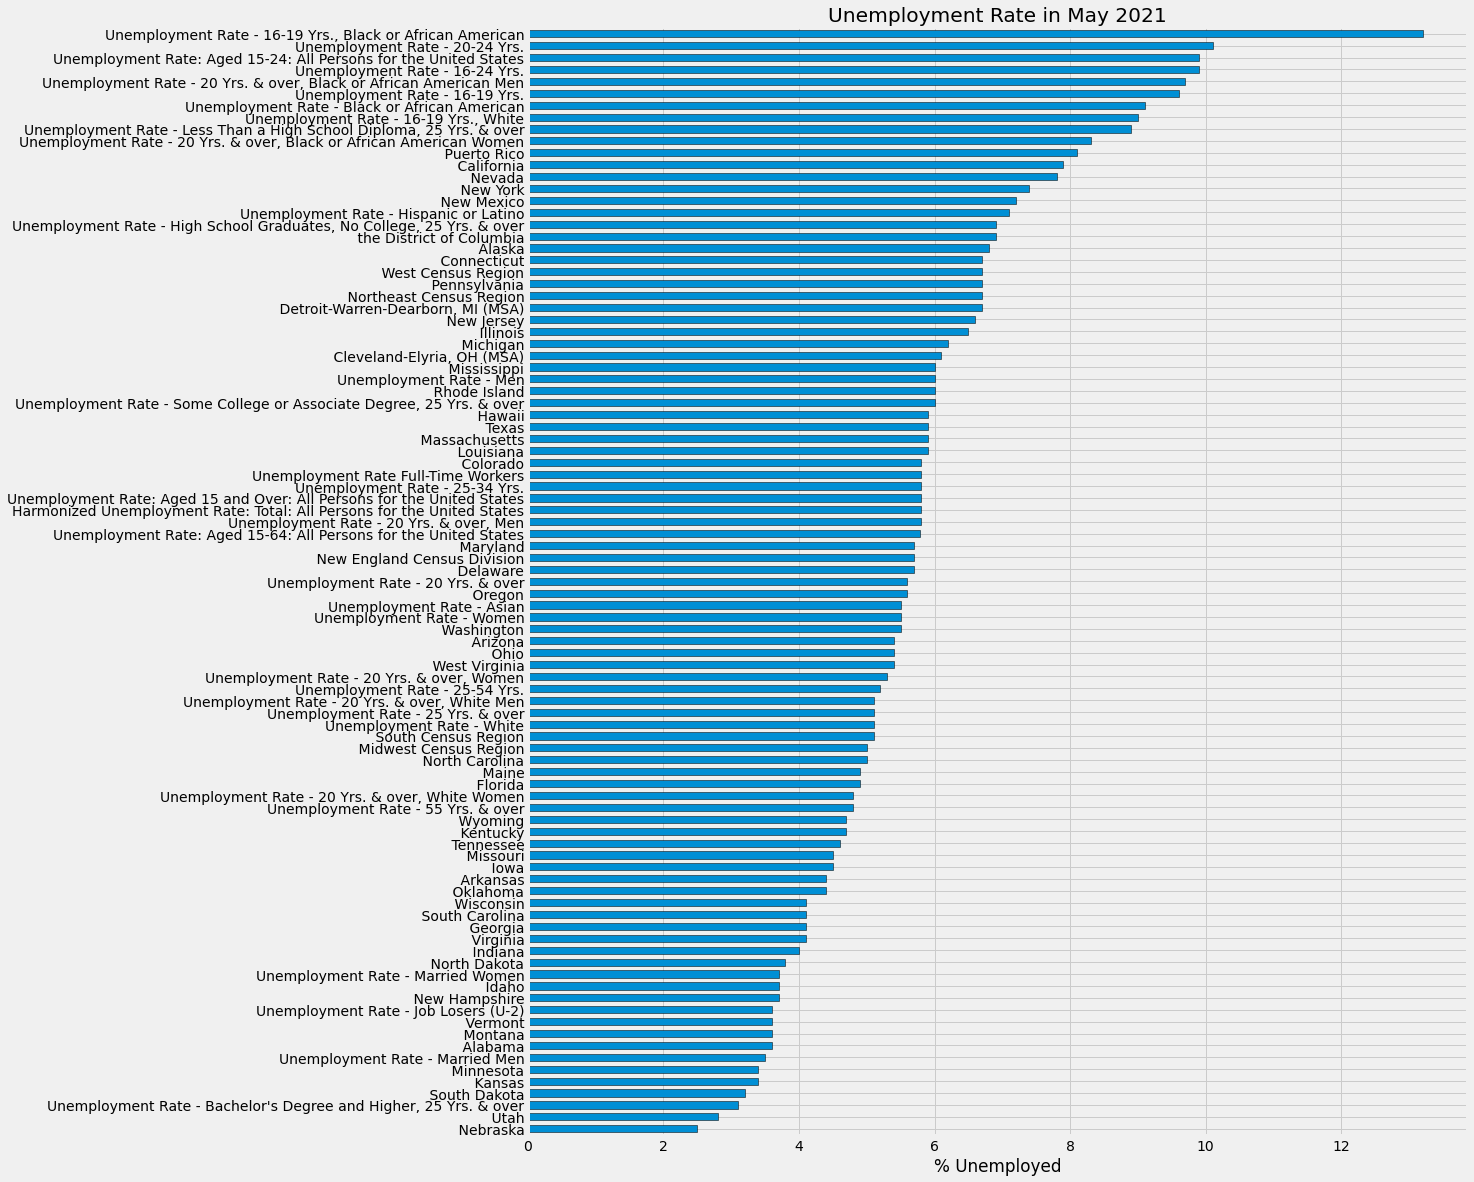

In [148]:
# Pull May 2021 Unemployment Rate per State and other categories
ax = unemp_states.loc[unemp_states.index == '2021-05-01'].T \
            .sort_values('2021-05-01') \
            .plot(kind='barh', figsize=(15,19), width = 0.6, edgecolor='black', title='Unemployment Rate in May 2021')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [149]:
# Pull Participation Rate
part_df = fred.search('participation_rate_state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [150]:
part_df

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2022-07-14   2022-07-14   
LNS11300060          LNS11300060     2022-07-14   2022-07-14   
LNS11300002          LNS11300002     2022-07-14   2022-07-14   
LNS11300001          LNS11300001     2022-07-14   2022-07-14   
LNS11324230          LNS11324230     2022-07-14   2022-07-14   
...                          ...            ...          ...   
LRACTTMAUSM156S  LRACTTMAUSM156S     2022-07-14   2022-07-14   
LRINTTMAUSM156S  LRINTTMAUSM156S     2022-07-14   2022-07-14   
LRINTTFEUSM156S  LRINTTFEUSM156S     2022-07-14   2022-07-14   
LRACTTTTUSM156S  LRACTTTTUSM156S     2022-07-14   2022-07-14   
LRINTTTTUSM156S  LRINTTTTUSM156S     2022-07-14   2022-07-14   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRACTTMAUSM156S  Activity Rate: Aged 15 and Over: Males for the...   
LRINTTMAUSM156S  Inactivity Rate: Aged 15 and Over: Males for t...   
LRINTTFEUSM156S  Inactivity Rate: Aged 15 and Over: Females for...   
LRACTTTTUSM156S  Activity Rate: Aged 15 and Over: All Persons f...   
LRINTTTTUSM156S  Inactivity Rate: Aged 15 and Over: All Persons...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2022-06-01   Monthly               M   
LNS11300060            1948-01-01      2022-06-01   Monthly               M   
LNS11300002            1948-01-01      2022-06-01   Monthly               M   
LNS11300001            1948-01-01      2022-06-01   Monthly               M   
LNS11324230            1948-01-01      2022-06-01   Monthly               M   
...                           ...             ...       ...             ...   
LRACTTMAUSM156S        1960-01-01      2022-05-01   Monthly               M   
LRINTTMAUSM156S        1975-01-01      2022-05-01   Monthly               M   
LRINTTFEUSM156S        1975-01-01      2022-05-01   Monthly               M   
LRACTTTTUSM156S        1960-01-01      2022-05-01   Monthly               M   
LRINTTTTUSM156S        1975-01-01      2022-05-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRACTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTMAUSM156S  Percent           %  Seasonally Adjusted   
LRINTTFEUSM156S  Percent           %  Seasonally Adjusted   
LRACTTTTUSM156S  Percent           %  Seasonally Adjusted   
LRINTTTTUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2022-07-08 07:44:02-05:00   
LNS11300060                            SA 2022-07-08 07:44:14-05:00   
LNS11300002                            SA 2022-07-08 07:44:15-05:00   
LNS11300001                            SA 2022-07-08 07:44:18-05:00   
LNS11324230                           

In [151]:
part_id_2_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []
for idx in part_df.index:
    res = fred.get_series(idx)
    res = res.to_frame(name=idx)
    all_results.append(res)
    
part_states = pd.concat(all_results, axis=1)

In [153]:
part_states.columns = [part_id_2_state[cols] for cols in part_states.columns]

In [156]:
part_states = part_states.dropna()

In [240]:
unemp_states.shape

(231, 93)

In [241]:
part_states = part_states.loc[part_states.index > '2002-12-01']

In [242]:
part_states.shape

(231, 109)

In [243]:
pindex = part_states.index
uindex = unemp_states.index

In [244]:
pindex.difference(uindex)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [217]:
part_states = part_states.loc[part_states.index != '2020-03-01']
part_states = part_states.loc[part_states.index != '2020-04-01']
part_states.shape

(231, 109)

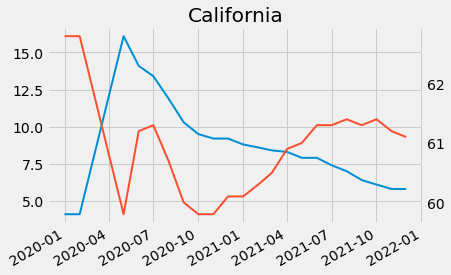

In [245]:
# Plot Unemployment vs Participation for California
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query('index >= 2020 and index < 2022')[' California'].plot(ax=ax,label='Unemployment', lw=2)
part_states.query('index >= 2020 and index < 2022')['California'].plot(ax=ax2,label='Participation', lw=2, color=color_pal[1])
ax2.grid(False)
ax.set_title('California')
plt.show()

In [246]:
unemp_states.columns = unemp_states.columns.str.replace(' ','')

In [250]:
len(part_states.columns.difference(unemp_states.columns))

69

In [256]:
part_states.drop(['Activity Rate: Aged 15 and Over: All Persons for the United States',
       'Activity Rate: Aged 15 and Over: Females for the United States',
       'Activity Rate: Aged 15 and Over: Males for the United States',
       'Activity Rate: Aged 15-24: All Persons for the United States',
       'Activity Rate: Aged 15-24: Females for the United States',
       'Activity Rate: Aged 15-24: Males for the United States',
       'Activity Rate: Aged 15-64: All Persons for the United States',
       'Activity Rate: Aged 15-64: Females for the United States',
       'Activity Rate: Aged 15-64: Males for the United States',
       'Activity Rate: Aged 15-74: All Persons for the United States',
       'Activity Rate: Aged 15-74: Females for the United States',
       'Activity Rate: Aged 15-74: Males for the United States',
       'Activity Rate: Aged 25-54: All Persons for the United States',
       'Activity Rate: Aged 25-54: Females for the United States',
       'Activity Rate: Aged 25-54: Males for the United States',
       'Activity Rate: Aged 55-64: All Persons for the United States',
       'Activity Rate: Aged 55-64: Females for the United States',
       'Activity Rate: Aged 55-64: Males for the United States',
       'Inactivity Rate: Aged 15 and Over: All Persons for the United States',
       'Inactivity Rate: Aged 15 and Over: Females for the United States',
       'Inactivity Rate: Aged 15 and Over: Males for the United States',
       'Inactivity Rate: Aged 15-24: All Persons for the United States',
       'Inactivity Rate: Aged 15-24: Females for the United States',
       'Inactivity Rate: Aged 15-24: Males for the United States',
       'Inactivity Rate: Aged 15-64: All Persons for the United States',
       'Inactivity Rate: Aged 15-64: Females for the United States',
       'Inactivity Rate: Aged 15-64: Males for the United States',
       'Inactivity Rate: Aged 15-74: All Persons for the United States',
       'Inactivity Rate: Aged 15-74: Females for the United States',
       'Inactivity Rate: Aged 15-74: Males for the United States',
       'Inactivity Rate: Aged 25-54: All Persons for the United States',
       'Inactivity Rate: Aged 25-54: Females for the United States',
       'Inactivity Rate: Aged 25-54: Males for the United States',
       'Inactivity Rate: Aged 55-64: All Persons for the United States',
       'Inactivity Rate: Aged 55-64: Females for the United States',
       'Inactivity Rate: Aged 55-64: Males for the United States',
       'Labor Force Participation Rate',
       'Labor Force Participation Rate - 16-19 Yrs.',
       'Labor Force Participation Rate - 16-19 Yrs., Black or African American',
       'Labor Force Participation Rate - 16-19 Yrs., White',
       'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Men',
       'Labor Force Participation Rate - 20 Yrs. & over, Black or African American Women',
       'Labor Force Participation Rate - 20 Yrs. & over, Men',
       'Labor Force Participation Rate - 20 Yrs. & over, White Men',
       'Labor Force Participation Rate - 20 Yrs. & over, White Women',
       'Labor Force Participation Rate - 20 Yrs. & over, Women',
       'Labor Force Participation Rate - 20-24 Yrs.',
       'Labor Force Participation Rate - 25-54 Yrs.',
       'Labor Force Participation Rate - 55 Yrs. & over',
       "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
       'Labor Force Participation Rate - Black or African American',
       'Labor Force Participation Rate - High School Graduates, No College, 25 Yrs. & over',
       'Labor Force Participation Rate - Hispanic or Latino',
       'Labor Force Participation Rate - Less Than a High School Diploma, 25 Yrs. & over',
       'Labor Force Participation Rate - Men',
       'Labor Force Participation Rate - Some College or Associate Degree, 25 Yrs. & over',
       'Labor Force Participation Rate - White',
       'Labor Force Participation Rate - Women'], axis=1, inplace=True)

In [258]:
unemp_states.drop(['UnemploymentRate-BlackorAfricanAmerican',
       'UnemploymentRate-20Yrs.&over,BlackorAfricanAmericanMen',
       'UnemploymentRate-20Yrs.&over',
       'UnemploymentRate-HispanicorLatino',
       'UnemploymentRate-JobLosers(U-2)', 'UnemploymentRate-Women',
       'UnemploymentRate-White', 'UnemploymentRate-Men',
       "UnemploymentRate-Bachelor'sDegreeandHigher,25Yrs.&over",
       'UnemploymentRate-16-19Yrs.',
       'UnemploymentRate:Aged15-64:AllPersonsfortheUnitedStates',
       'UnemploymentRate-HighSchoolGraduates,NoCollege,25Yrs.&over',
       'UnemploymentRate-Asian',
       'UnemploymentRate-16-19Yrs.,BlackorAfricanAmerican', 'UnemploymentRate-16-24Yrs.',
       'UnemploymentRate-20Yrs.&over,BlackorAfricanAmericanWomen',
       'UnemploymentRate-LessThanaHighSchoolDiploma,25Yrs.&over',
       'UnemploymentRate-20-24Yrs.',
       'UnemploymentRate-20Yrs.&over,WhiteMen',
       'UnemploymentRate-25-54Yrs.',
       'UnemploymentRate-20Yrs.&over,Women',
       'UnemploymentRate-20Yrs.&over,WhiteWomen',
       'UnemploymentRate-SomeCollegeorAssociateDegree,25Yrs.&over',
       'UnemploymentRate-20Yrs.&over,Men',
       'HarmonizedUnemploymentRate:Total:AllPersonsfortheUnitedStates',
       'UnemploymentRate:Aged15andOver:AllPersonsfortheUnitedStates',
       'UnemploymentRate-MarriedWomen',
       'UnemploymentRate:Aged15-24:AllPersonsfortheUnitedStates',
       'UnemploymentRate-25Yrs.&over', 'UnemploymentRate-55Yrs.&over',
       'UnemploymentRate-MarriedMen',
       'NewEnglandCensusDivision', 'UnemploymentRate-25-34Yrs.',
       'UnemploymentRate-16-19Yrs.,White', 'UnemploymentRateFull-TimeWorkers'], axis=1, inplace=True)

In [263]:
part_states.columns

Index(['California', 'Florida', 'Wisconsin', 'Kentucky', 'Texas', 'Minnesota',
       'Alabama', 'Michigan', 'Ohio', 'New York', 'Arizona', 'Tennessee',
       'North Carolina', 'Colorado', 'Utah', 'Maryland', 'Iowa',
       'West Virginia', 'Illinois', 'Pennsylvania', 'Washington', 'Georgia',
       'New Mexico', 'South Carolina', 'Indiana', 'Mississippi', 'Virginia',
       'Arkansas', 'Oregon', 'Massachusetts', 'Kansas', 'Missouri',
       'New Jersey', 'Oklahoma', 'Nevada', 'Nebraska', 'Maine', 'Louisiana',
       'Hawaii', 'Idaho', 'District Of Columbia', 'Alaska', 'Connecticut',
       'South Dakota', 'Rhode Island', 'Vermont', 'North Dakota', 'Montana',
       'New Hampshire', 'Wyoming', 'Delaware'],
      dtype='object')

In [262]:
unemp_states.columns.difference(part_states.columns)

Index(['Cleveland-Elyria,OH(MSA)', 'Detroit-Warren-Dearborn,MI(MSA)',
       'MidwestCensusRegion', 'NewHampshire', 'NewJersey', 'NewMexico',
       'NewYork', 'NorthCarolina', 'NorthDakota', 'NortheastCensusRegion',
       'PuertoRico', 'RhodeIsland', 'SouthCarolina', 'SouthCensusRegion',
       'SouthDakota', 'WestCensusRegion', 'WestVirginia',
       'theDistrictofColumbia'],
      dtype='object')

In [266]:
unemp_states.drop(['Cleveland-Elyria,OH(MSA)', 'Detroit-Warren-Dearborn,MI(MSA)',
       'MidwestCensusRegion','NortheastCensusRegion',
       'PuertoRico','SouthCensusRegion',
       'WestCensusRegion'], axis=1, inplace=True)

In [269]:
unemp_states.columns.difference(part_states.columns)

Index(['NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina',
       'NorthDakota', 'RhodeIsland', 'SouthCarolina', 'SouthDakota',
       'WestVirginia', 'theDistrictofColumbia'],
      dtype='object')

In [270]:
unemp_states.rename(columns = {'NewHampshire':'New Hampshire', 'NewJersey':'New Jersey', 'NewMexico':'New Mexico', 
                               'NewYork':'New York', 'NorthCarolina':'North Carolina', 'NorthDakota':'North Dakota',
                              'RhodeIsland':'Rhode Island', 'SouthCarolina':'South Carolina', 'SouthDakota':'South Dakota',
                              'WestVirginia':'West Virginia', 'theDistrictofColumbia':'District Of Columbia'}, inplace=True)

In [271]:
unemp_states.columns.difference(part_states.columns)

Index([], dtype='object')

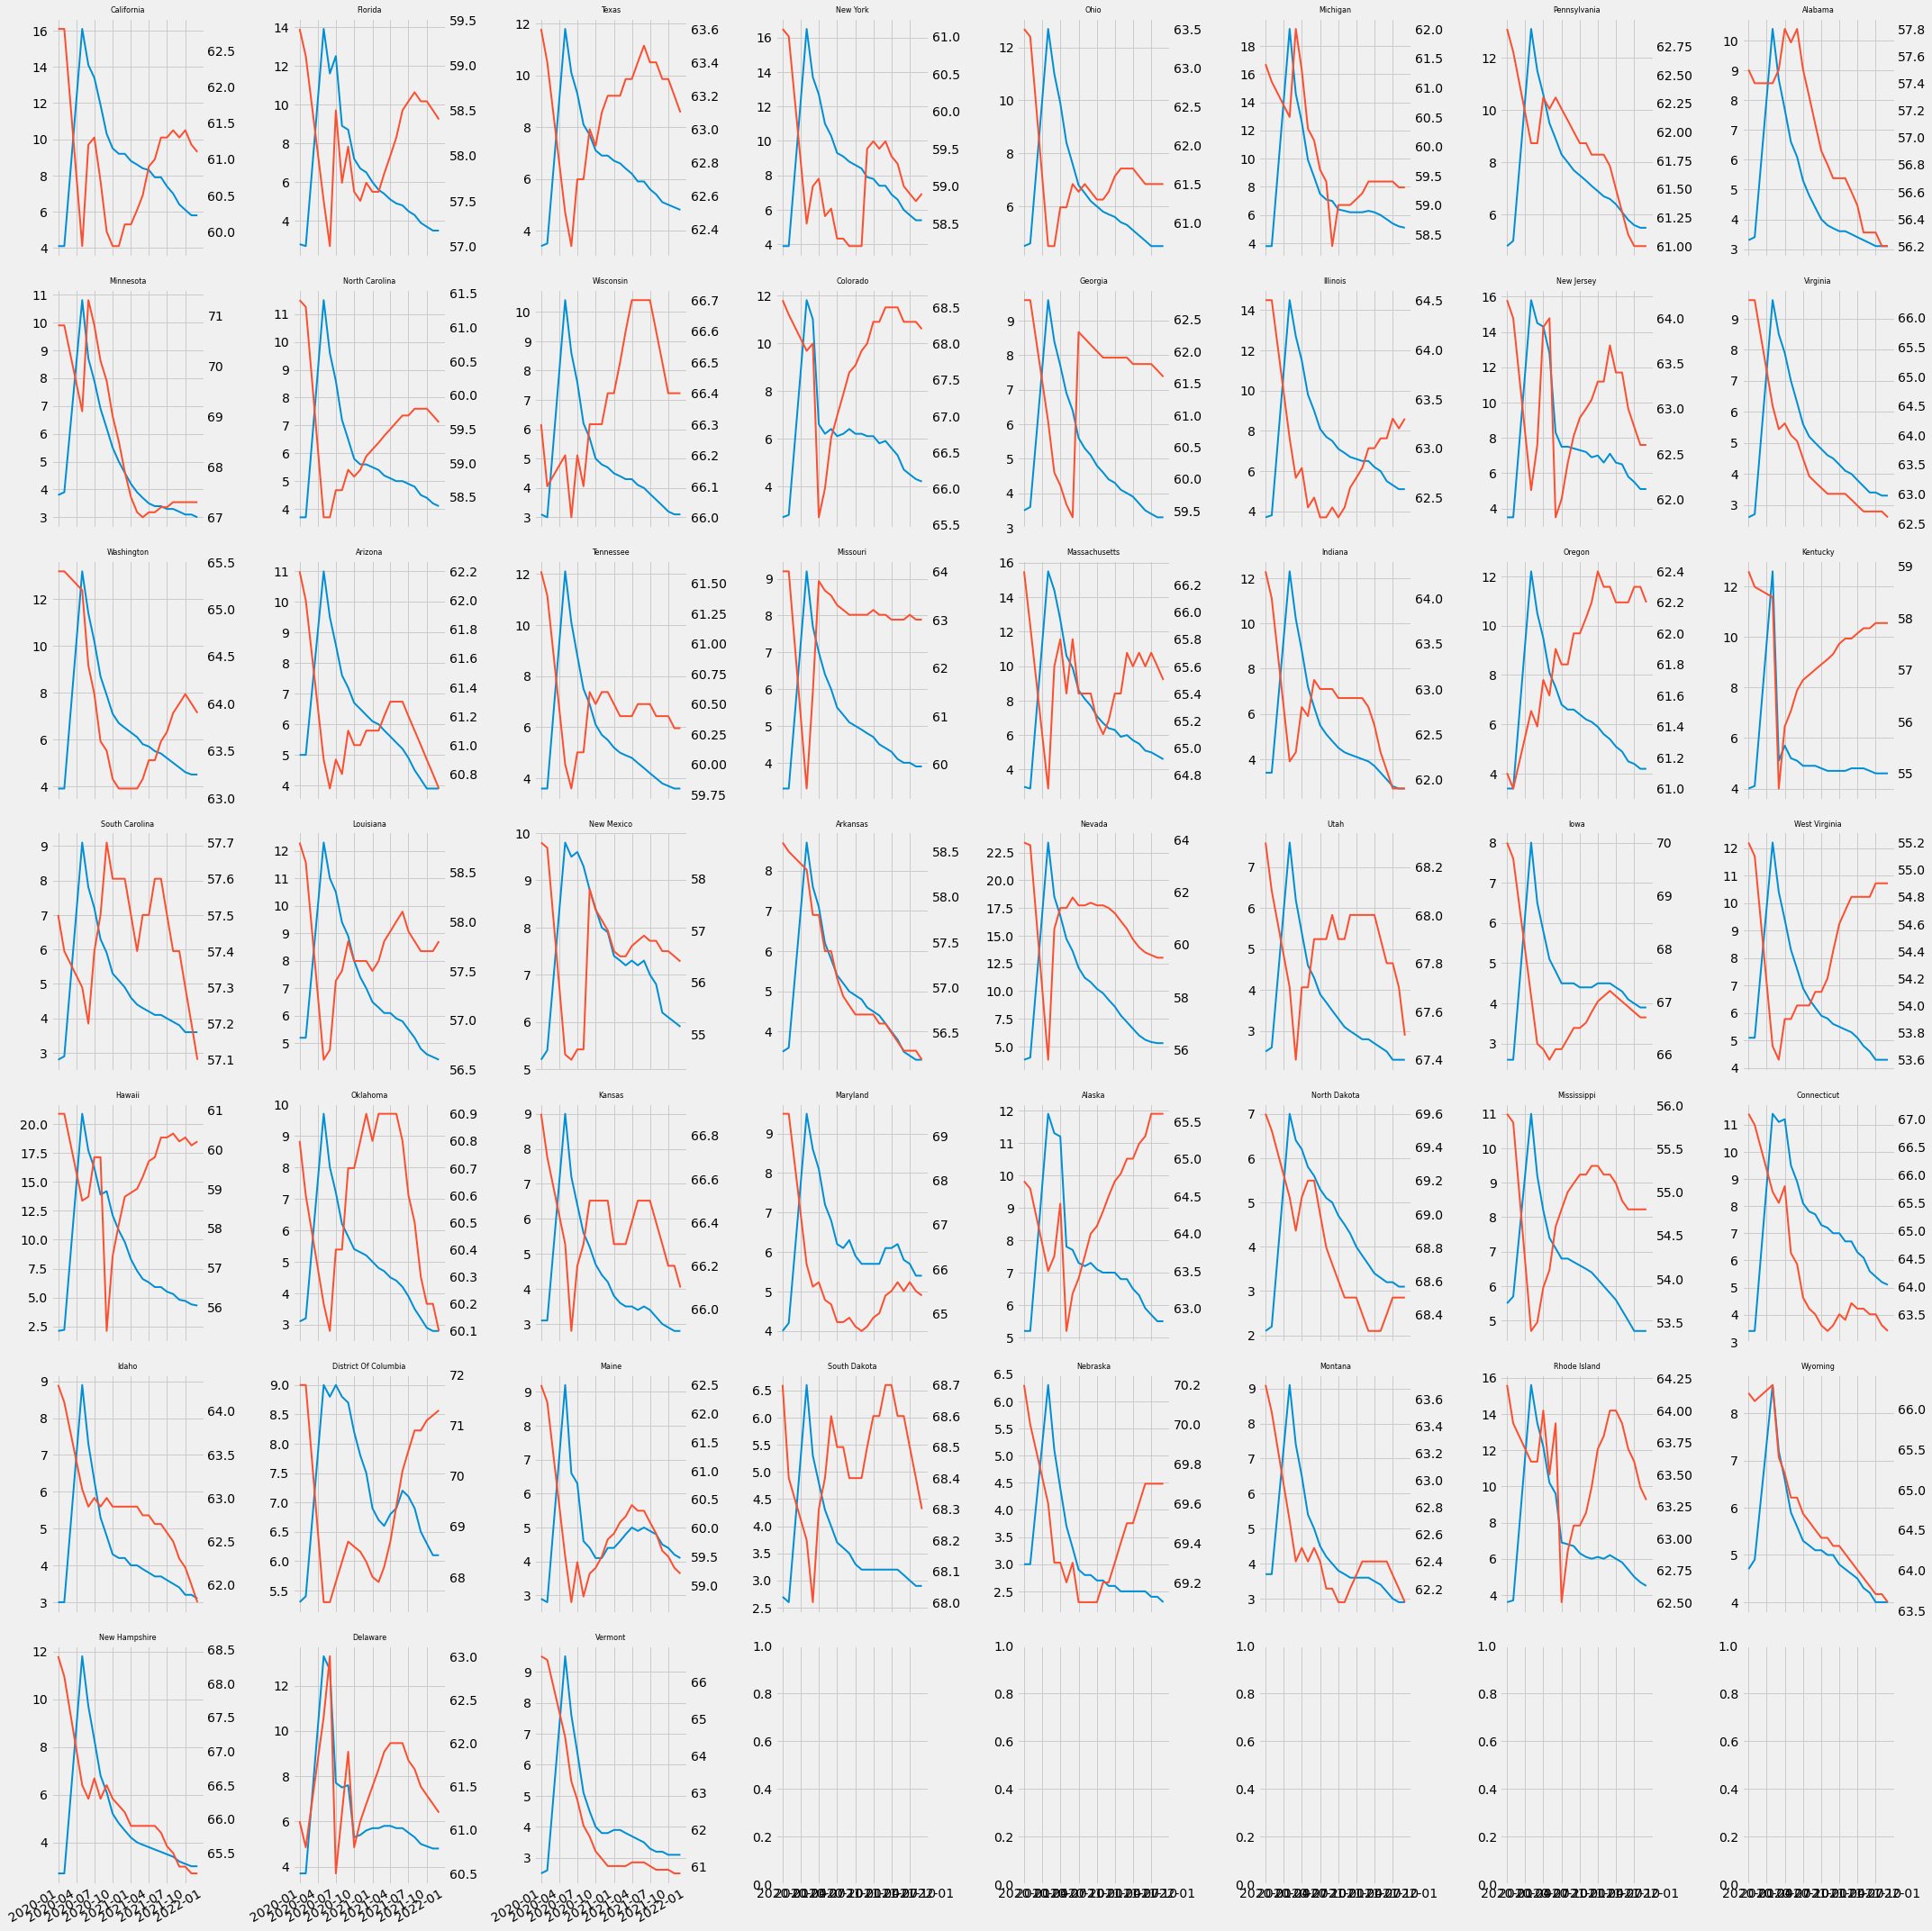

In [279]:
# Plot Unemployment vs Participation for all states and other categories
fig, axes = plt.subplots(7, 8, figsize=(30,30), sharex=True)
axes = axes.flatten()

i = 0
for state in unemp_states.columns:
    ax2 = axes[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axes[i],label='Unemployment', lw=2)
    part_states.query('index >= 2020 and index < 2022')[state.strip()].plot(ax=ax2,label='Participation', lw=2, color=color_pal[1])
    ax2.grid(False)
    axes[i].set_title(state, fontsize=8)
    i += 1
plt.tight_layout()   # so that titles don't overlap
plt.show()

In [281]:
# Automated EDA for unemp_states
Unemp_report = sweetviz.analyze([unemp_states, "Unemployment_States"])

                                             |                                             | [  0%]   00:00 ->…

In [282]:
Unemp_report.show_html('Unemp_report.html')

Report Unemp_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [285]:
# Automated EDA for part_states
Part_report = sweetviz.analyze([part_states, "Participation for all States"])

                                             |                                             | [  0%]   00:00 ->…

In [286]:
Part_report.show_html('Part_report.html')

Report Part_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
